In [1]:
%matplotlib inline
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
from skimage import feature
from skimage.segmentation import watershed # for the part 2
import matplotlib.pyplot as plt

In [2]:
# filename = "./data/day09test.txt"
filename = "./data/day09a.txt"
floor_list = []
with open(filename, 'r') as ff:
    line = ff.readline()
    while line:
        floor_list.append([int(n) for n in line[:-1]]) # it seems to read the newline character?!
        line = ff.readline()
floor = np.array(floor_list)

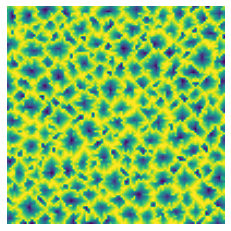

In [3]:
fig, ax = plt.subplots()
ax.imshow(floor, interpolation='bilinear')
ax.set_axis_off();
plt.show()

In [4]:
footprint = np.zeros((3, 3))
footprint[[0, 1, 1, 1, 2], [1, 0, 1, 2, 1]] = 1
peaks_mask = feature.peak_local_max(9-floor, exclude_border=False, indices=False, footprint=footprint)

np.sum(1+floor[peaks_mask])

<ipython-input-4-938bebab73f1>:3: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  peaks_mask = feature.peak_local_max(9-floor, exclude_border=False, indices=False, footprint=footprint)


550

## part 2

Created a color palette via https://medialab.github.io/iwanthue/

In [5]:
from matplotlib.colors import LinearSegmentedColormap

colors = ["#d29db0",
"#9fefd7",
"#d799bb",
"#cbffd6",
"#ddaad6",
"#def7c0",
"#9db4ea",
"#edcd9a",
"#74bbe5",
"#f9c99f",
"#87deff",
"#e4a08f",
"#86e8eb",
"#ffb9b5",
"#acfffc",
"#ffc8b8",
"#84cbad",
"#ffdff8",
"#80b993",
"#e5d9ff",
"#9ac698",
"#b8a4c7",
"#aee7be",
"#c2a3b8",
"#c8ffe7",
"#c3a59d",
"#aef2ff",
"#b2ad7c",
"#a9dbff",
"#c2cd95",
"#d1ddff",
"#ffe9c4",
"#84b3bf",
"#fff8d9",
"#9caeb7",
"#e9ffde",
"#9db0a4",
"#ffe4e2",
"#8db4a0",
"#ebfffa"]
cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

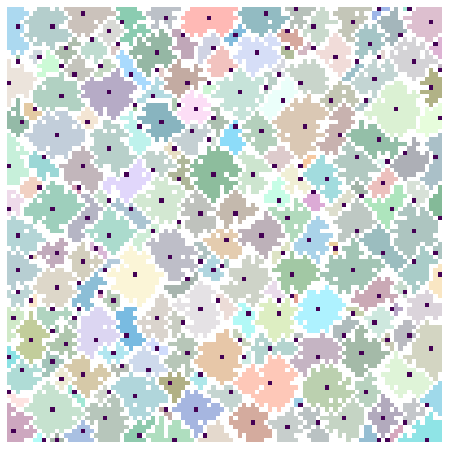

In [6]:
markers, n = nd.label(peaks_mask)
markers[markers>0] = np.random.permutation(np.arange(101, n+101))
labels = watershed(9-floor, markers, mask=floor<9)
fig, ax = plt.subplots(figsize=(8, 8))
# ax.imshow(floor, interpolation='bilinear');
ax.imshow(np.ma.masked_equal(labels, 0), cmap=cmap1, interpolation='antialiased');
ax.imshow(np.ma.masked_less(peaks_mask, 1));
ax.set_axis_off()
plt.show()

In [7]:
velicine = []
for mark in markers[peaks_mask]:
    if mark > 0:
        velicine.append(np.sum(labels == mark))
basin_sizes = np.array(velicine)

np.prod(np.sort(basin_sizes)[-3:])

1100682